<a href="https://colab.research.google.com/github/Luthfi-Data/Sales_Analysis/blob/main/Data_Science_Project_2_Luthfi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

#autenticating to google
auth.authenticate_user()
creds,_= default()
gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#defining my worksheet
worksheet = gc.open('dataset-ecommerce_week 7').sheet1

#get all values gives a list of rows
rows = worksheet.get_all_values()

#Convert to a dataframe Pandas
df = pd.DataFrame(rows)

#Membuat row pertama menjadi Head
df.columns = df.iloc[0]
df = df.iloc[1:] #isinya baris index 1 - selesai

In [ ]:
df

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
1,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
2,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
3,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
4,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
5,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51302,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


#Data Manipulation

In [ ]:
#converting to date time
df["Order Date"] = pd.to_datetime(df["Order Date"])

# sorting for data in chronological order
df = df.sort_values(by="Order Date")

#menghilangkan $ di kolom sales
df["Sales"] = df["Sales"].str.replace("[^\d.]","", regex=True)
df

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
25511,FA-2015-4996,2015-01-01,2015-01-07,6,Standard Class,Fashion,Shirts,196.00,4,0.01,...,$10.80,Medium,MS-0015202,Oneill Williams,Consumer,San Salvador,San Salvador,El Salvador,Central,Jan
2623,AU-2015-2623,2015-01-01,2015-01-05,4,First Class,Auto & Accessories,Car & Bike Care,118.00,3,0.02,...,$3.10,Medium,ON-002623,Howell Eason,Consumer,Cannes,Provence-Alpes-Côte d'Azur,France,Central,Jan
38705,FA-2015-18190,2015-01-01,2015-01-10,9,Standard Class,Fashion,Running Shoes,224.00,1,0.05,...,$13.30,Medium,EN-0028396,Carroll Dahlen,Consumer,León,Guanajuato,Mexico,North,Jan
18802,HF-2015-8596,2015-01-01,2015-01-02,1,Second Class,Home & Furniture,Dinning Tables,119.00,2,0.03,...,$3.20,Medium,SE-0049577,Willis Crouse,Home Office,New York City,New York,United States,East,Jan
26939,FA-2015-6424,2015-01-01,2015-01-04,3,Standard Class,Fashion,Fossil Watch,159.00,4,0.03,...,$6.00,Medium,EN-0016630,Koch Vanderzanden,Home Office,Park Ridge,Illinois,United States,Central,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51293,FA-2015-30778,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51291,FA-2015-30776,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Dec
51302,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51296,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51303 entries, 25511 to 51303
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51303 non-null  object        
 1   Order Date        51303 non-null  datetime64[ns]
 2   Ship Date         51303 non-null  object        
 3   Aging             51303 non-null  object        
 4   Ship Mode         51303 non-null  object        
 5   Product Category  51303 non-null  object        
 6   Product           51303 non-null  object        
 7   Sales             51303 non-null  float64       
 8   Quantity          51303 non-null  object        
 9   Discount          51303 non-null  object        
 10  Profit            51303 non-null  object        
 11  Shipping Cost     51303 non-null  object        
 12  Order Priority    51303 non-null  object        
 13  Customer ID       51303 non-null  object        
 14  Customer Name     

##Line Chart

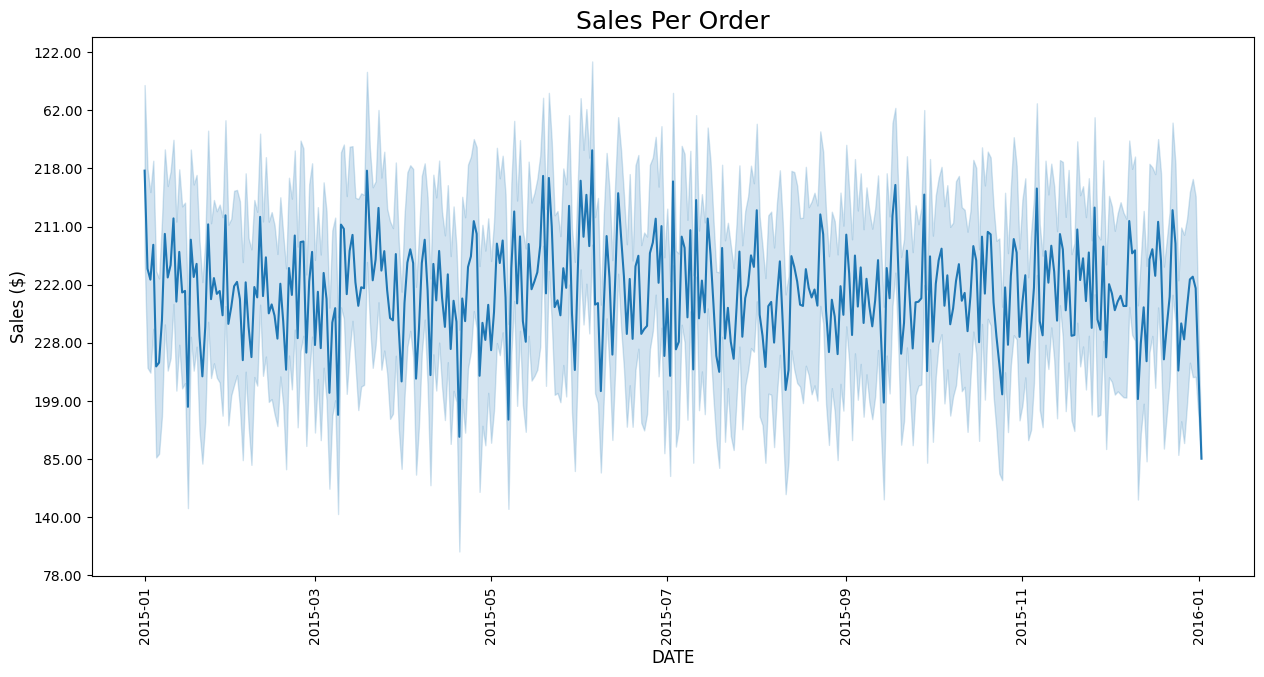

In [ ]:
# figure size in inches
plt.rcParams['figure.figsize'] = 15, 7

# rotating x-axis values
plt.xticks(rotation = 'vertical')

# line plot
sns.lineplot(data = df, x='Order Date', y='Sales')

#labeling
plt.title(f"Sales Per Order", fontsize=18) #title
plt.xlabel("DATE", fontsize=12) #x-axis label
plt.ylabel("Sales ($)", fontsize=12) #y-axis label

#showing plot
plt.show()

#Pie Chart

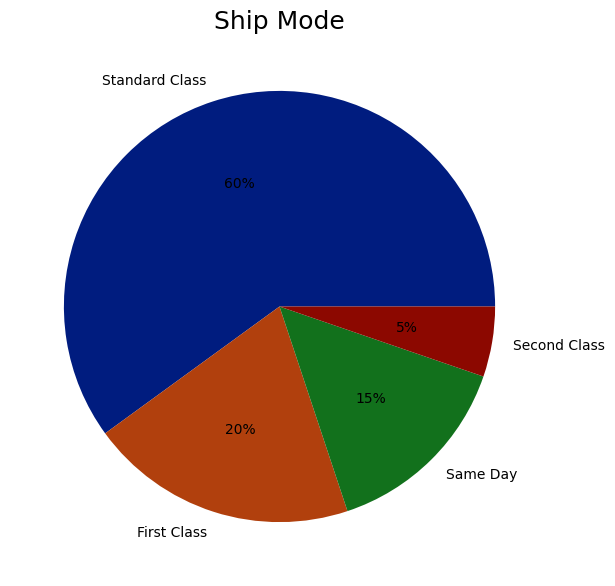

In [ ]:
data = df['Ship Mode'].value_counts() #banyak datanya
keys = df['Ship Mode'].unique() #label

#define seaborn color palette to use
palette_color = sns.color_palette("dark")

#plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"Ship Mode", fontsize=18)

#displaying chart
plt.show()

#Bar Chart

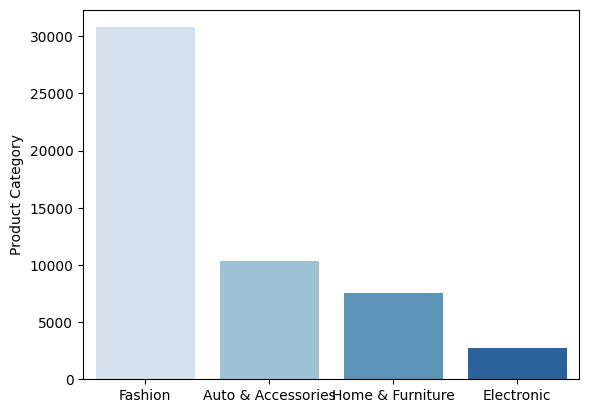

In [ ]:
y = df["Product Category"].value_counts()
x = df["Product Category"].unique()

#Draw Bar Chart
sns.barplot(x=x,y=y, data = df, palette="Blues")

plt.show()

**DS Project 2 buat chart beserta penjelasannya atau insight**

buat visualisasi univariate atau bivariate dari dataset di atas (gunakan bar chart, pie chart, atau line chart) minimal 5 visualisasi

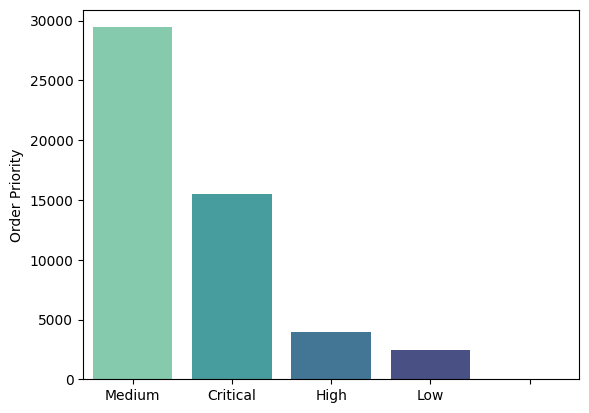

In [ ]:
#order priority
opcount = df["Order Priority"].value_counts()
opunique = df["Order Priority"].unique()

#Draw Bar Chart
sns.barplot(x=opunique,y=opcount, data = df, palette="mako_r")

plt.show()


Prioritas orderan yang paling banyak adalah medium

<Axes: ylabel='Segment'>

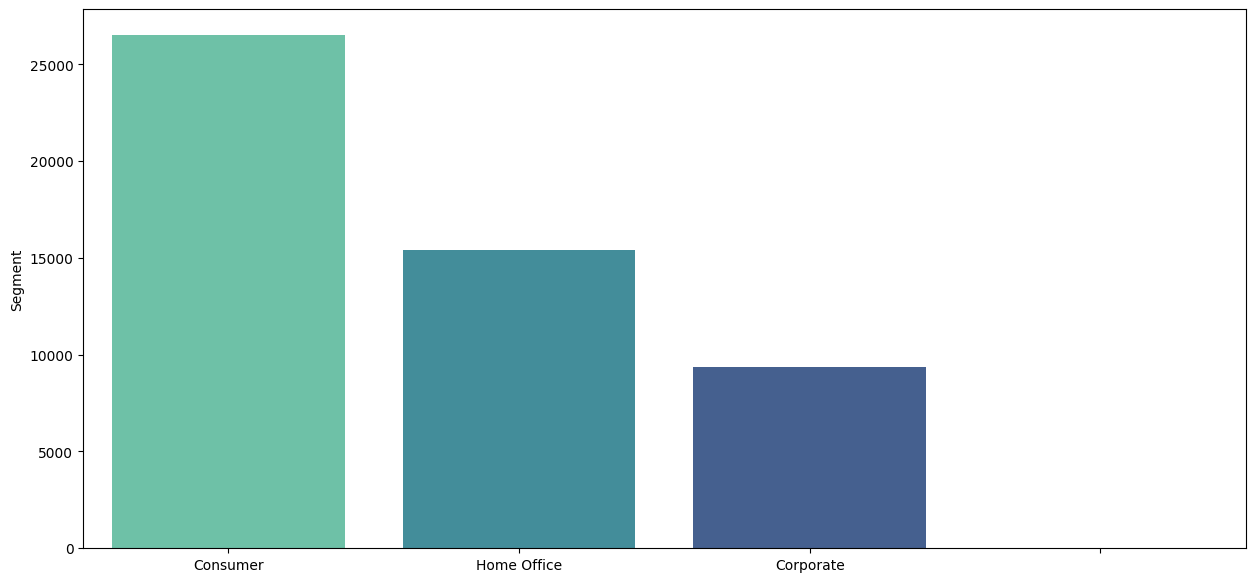

In [ ]:
#segment
sgcount = df["Segment"].value_counts()
sgunique = df["Segment"].unique()

#Draw Bar Chart
sns.barplot(x=sgunique,y=sgcount, data = df, palette="mako_r")


The most ordered product segment is the consumer segment.

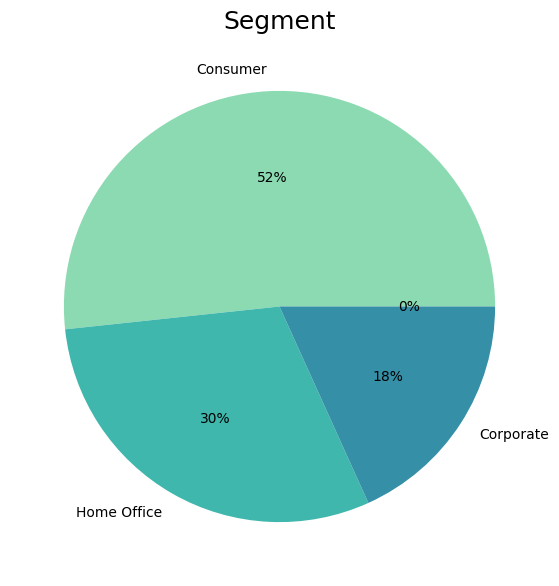

In [ ]:
#Pie Chart
#define seaborn color palette to use
palette_color = sns.color_palette("mako_r")

#plotting data on chart
plt.pie(sgcount, labels=sgunique, colors=palette_color, autopct='%.0f%%')
plt.title(f"Segment", fontsize=18)

#displaying chart
plt.show()

In [ ]:
#product
#top 10 product
top10_list = df['Product'].value_counts()[:10].index.tolist()
top10_list

['Sports Wear',
 'Fossil Watch',
 'Titak watch',
 'Running Shoes',
 'Formal Shoes',
 'Suits',
 'Casula Shoes',
 'Sneakers',
 'Shirts',
 'T - Shirts']

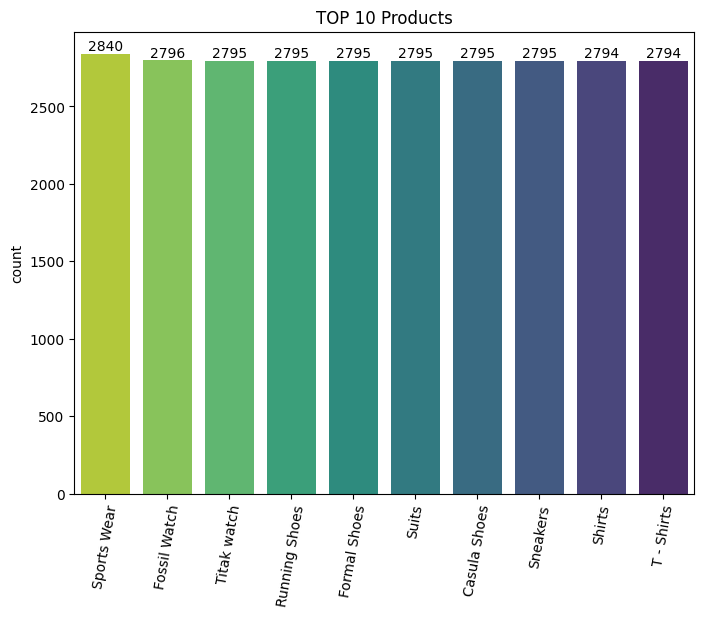

In [ ]:
#bar chart
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Product', data=df[df['Product'].isin(top10_list)], order = top10_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 10 Products')
plt.xlabel('')
plt.show()

The most ordered product is sports wear

In [ ]:
#top 10 country
top10_country = df['Country'].value_counts()[:10].index.tolist()
top10_country

['United States',
 'Australia',
 'France',
 'Mexico',
 'Germany',
 'China',
 'United Kingdom',
 'Brazil',
 'India',
 'Indonesia']

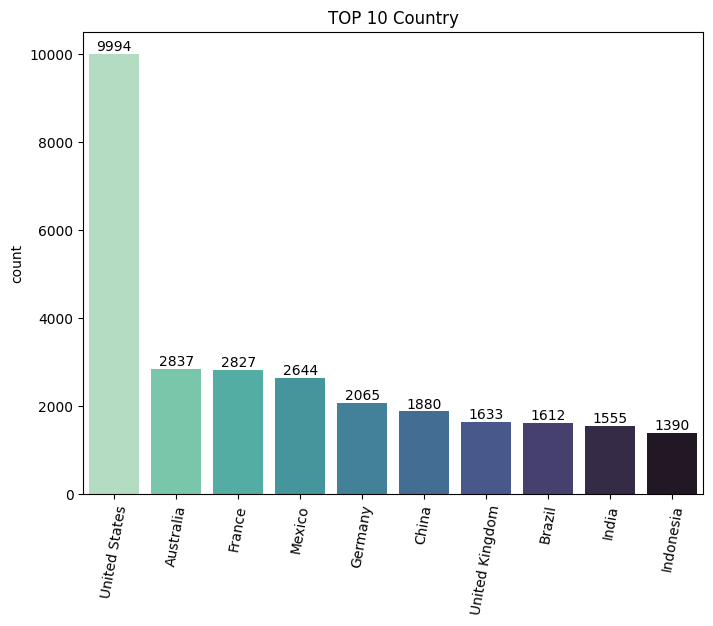

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Country', data=df[df['Country'].isin(top10_country)], order = top10_country, palette='mako_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 10 Country')
plt.xlabel('')
plt.show()

The country with the most number of orders is United States

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51303 entries, 25511 to 51303
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51303 non-null  object        
 1   Order Date        51303 non-null  datetime64[ns]
 2   Ship Date         51303 non-null  object        
 3   Aging             51303 non-null  object        
 4   Ship Mode         51303 non-null  object        
 5   Product Category  51303 non-null  object        
 6   Product           51303 non-null  object        
 7   Sales             51303 non-null  object        
 8   Quantity          51303 non-null  object        
 9   Discount          51303 non-null  object        
 10  Profit            51303 non-null  object        
 11  Shipping Cost     51303 non-null  object        
 12  Order Priority    51303 non-null  object        
 13  Customer ID       51303 non-null  object        
 14  Customer Name     

In [ ]:
#sales per product category

#ubah sales menjadi numerik
df['Sales'] = pd.to_numeric(df['Sales'])

sales_category = df.groupby("Product Category")["Sales"].sum()
sales_category

Product Category
Auto & Accessories    1096928.0
Electronic             394738.0
Fashion               5213202.0
Home & Furniture      1319407.0
Name: Sales, dtype: float64

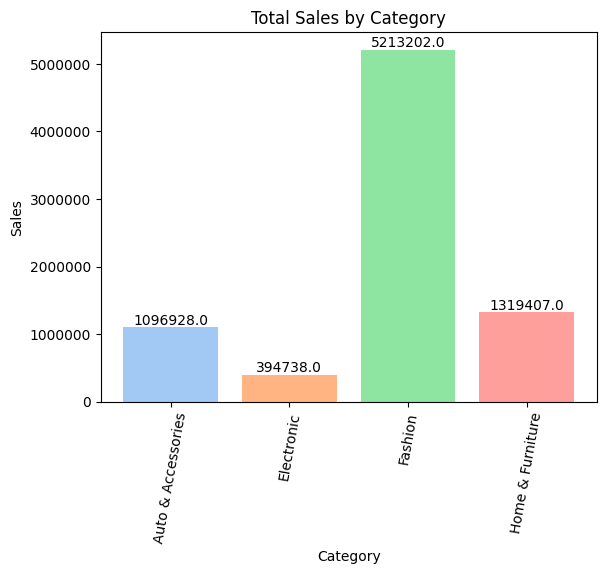

In [ ]:
#sales per Product Category
colors = sns.color_palette('pastel')
# Plot bar chart

plt.bar(sales_category.index, sales_category.values, color=colors)

# Mengatur format tick label Y tanpa notasi ilmiah (e)
plt.ticklabel_format(style='plain', axis='y')

# Menampilkan nilai pada setiap batang
for i, value in enumerate(sales_category.values):
    plt.text(i, value, str(value), ha='center', va='bottom')


plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=80)
plt.show()

The product category with the most sales is Fashion